In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
TOFF_A = np.array([18.0,18.0,17.8,17.8,18.0]) # ns
TOFF_B = np.array([18.2,18.0,18.0,18.0,18.0]) # ns                

In [79]:
print(0.76/(20.6 - 18.0)*10/2.99)

0.9776177000257262


In [80]:
TZ = np.mean([13.6,13.4,13.4])
D = 0
print("tz:  ", TZ)

tz:   13.466666666666667


In [135]:
T=np.mean([15.2]) # res: 0.2 scale # 5 ns
D = 34+36
DT = T - TZ
cmeas = D / DT /10 
unc = (0.2/DT)*cmeas
print(cmeas, "+/-", unc)
print(D,",",T)

4.03846153846154 +/- 0.4659763313609472
70 , 15.2


In [138]:
T=np.mean([16.4,16.2,16.2]) # res: 0.2 scale # 5 ns
D = 101
DT = T - TZ
cmeas = D / DT /10 
unc = (0.2/DT)*cmeas
print(cmeas, "+/-", unc)
print(D,",",T)

3.6071428571428585 +/- 0.25765306122449005
101 , 16.266666666666666


In [139]:
T=np.mean([19.0,18.6,19.2]) # res: 0.2 scale # 5 ns
D = 149
DT = T - TZ
cmeas = D / DT /10 
unc = (0.2/DT)*cmeas
print(cmeas, "+/-", unc)
print(D,",",T)
D = 75+74

2.725609756097561 +/- 0.09971743010113027
149 , 18.933333333333334


In [140]:
T=np.mean([20.2]) # res: 0.2 scale # 5 ns
D = 201.5
DT = T - TZ
cmeas = D / DT /10 
unc = (0.2/DT)*cmeas
print(cmeas, "+/-", unc)
print(D,",",T)
D = 75+74

2.9925742574257432 +/- 0.0888883442799726
201.5 , 20.2


#### After tightening, may have to nudge.
#

mfit 0.03510577667282633  +/- 0.0013043286992656322
cfit 2.848534044182111  +/- 0.10583513759824756


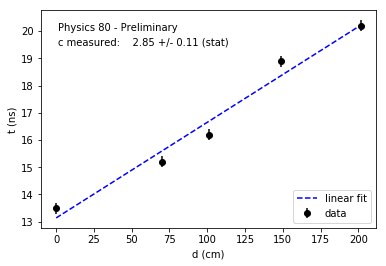

In [150]:
def linear_func(x, a, b):
    return a*x + b

tunc = 0.2
d  = np.array([0,    70,   101,   149, 201.5])
t  = np.array([13.5, 15.2, 16.2, 18.9, 20.2])
sigma = np.full(size(t), tunc) 
plt.errorbar(d,t,yerr=tunc,fmt="ko",label="data")

guess_a = 0.5
guess_b = 0.0
#par, cov = optimize.curve_fit(linear_func, d,t,p0=[guess_a, guess_b])
par, cov = optimize.curve_fit(linear_func, d,t,sigma=sigma,absolute_sigma=True,p0=[guess_a, guess_b])

mfit = par[0]
bfit = par[1]
munc = sqrt(diag(cov))[0]

cfit = 1.0/mfit/10.0
cunc = cfit*(munc/mfit)
print("mfit", mfit, " +/-", munc)
print("cfit", cfit, " +/-", cunc)
xf = np.linspace(0.0,200.0,50)
yf = linear_func(x, mfit, bfit)
plt.plot(xf,yf,"b--",label="linear fit")
plt.xlabel("d (cm)")
plt.ylabel("t (ns)")

plt.text(1.51, 20, "Physics 80 - Preliminary")
np.set_printoptions(precision=3)
plt.text(1.51, 19.5, "c measured:    "+str(format(cfit, '.2f'))+" +/- "+str(format(cunc, '.2f'))+ " (stat)")
plt.legend(loc=4)
plt.savefig("cfit.pdf")